<a href="https://colab.research.google.com/github/jhagihara/Nutrition-PCA-Analysis/blob/main/USDA_nutrition_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the USDA nutrition dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets for DSML/USDA_nutrition.csv')
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [ ]:
# Checking for NaN
print(data.isna().sum())

ID                     0
FoodGroup              0
ShortDescrip           0
Descrip                0
CommonName          7555
MfgName             7058
ScientificName      7886
Energy_kcal            0
Protein_g              0
Fat_g                  0
Carb_g                 0
Sugar_g                0
Fiber_g                0
VitA_mcg               0
VitB6_mg               0
VitB12_mcg             0
VitC_mg                0
VitE_mg                0
Folate_mcg             0
Niacin_mg              0
Riboflavin_mg          0
Thiamin_mg             0
Calcium_mg             0
Copper_mcg             0
Iron_mg                0
Magnesium_mg           0
Manganese_mg           0
Phosphorus_mg          0
Selenium_mcg           0
Zinc_mg                0
VitA_USRDA             0
VitB6_USRDA            0
VitB12_USRDA           0
VitC_USRDA             0
VitE_USRDA             0
Folate_USRDA           0
Niacin_USRDA           0
Riboflavin_USRDA       0
Thiamin_USRDA          0
Calcium_USRDA          0


In [ ]:
# checking the data's size
print("Rows: ",  data.shape[0], "\nCols: ", data.shape[1])

Rows:  8618 
Cols:  45


In [ ]:
# Dropping CommonName, MfgName, ScientificName and ID
data1 = data.drop(columns=['ID', 'CommonName', 'MfgName', 'ScientificName'])
data1.isna().sum()

FoodGroup           0
ShortDescrip        0
Descrip             0
Energy_kcal         0
Protein_g           0
Fat_g               0
Carb_g              0
Sugar_g             0
Fiber_g             0
VitA_mcg            0
VitB6_mg            0
VitB12_mcg          0
VitC_mg             0
VitE_mg             0
Folate_mcg          0
Niacin_mg           0
Riboflavin_mg       0
Thiamin_mg          0
Calcium_mg          0
Copper_mcg          0
Iron_mg             0
Magnesium_mg        0
Manganese_mg        0
Phosphorus_mg       0
Selenium_mcg        0
Zinc_mg             0
VitA_USRDA          0
VitB6_USRDA         0
VitB12_USRDA        0
VitC_USRDA          0
VitE_USRDA          0
Folate_USRDA        0
Niacin_USRDA        0
Riboflavin_USRDA    0
Thiamin_USRDA       0
Calcium_USRDA       0
Copper_USRDA        0
Magnesium_USRDA     0
Phosphorus_USRDA    0
Selenium_USRDA      0
Zinc_USRDA          0
dtype: int64

In [ ]:
# checking for duplicates
data1.duplicated().sum()

0

In [ ]:
# getting datatype of all cols
data1.dtypes

FoodGroup            object
ShortDescrip         object
Descrip              object
Energy_kcal         float64
Protein_g           float64
Fat_g               float64
Carb_g              float64
Sugar_g             float64
Fiber_g             float64
VitA_mcg            float64
VitB6_mg            float64
VitB12_mcg          float64
VitC_mg             float64
VitE_mg             float64
Folate_mcg          float64
Niacin_mg           float64
Riboflavin_mg       float64
Thiamin_mg          float64
Calcium_mg          float64
Copper_mcg          float64
Iron_mg             float64
Magnesium_mg        float64
Manganese_mg        float64
Phosphorus_mg       float64
Selenium_mcg        float64
Zinc_mg             float64
VitA_USRDA          float64
VitB6_USRDA         float64
VitB12_USRDA        float64
VitC_USRDA          float64
VitE_USRDA          float64
Folate_USRDA        float64
Niacin_USRDA        float64
Riboflavin_USRDA    float64
Thiamin_USRDA       float64
Calcium_USRDA       

In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy_kcal,8618.0,226.438617,169.388910,0.0,93.000000,191.000000,336.000000,902.000000
Protein_g,8618.0,11.523910,10.550590,0.0,2.470000,8.285000,19.977500,88.320000
Fat_g,8618.0,10.647024,15.866353,0.0,0.992500,5.235000,13.900000,100.000000
Carb_g,8618.0,21.819062,27.239000,0.0,0.040000,8.945000,32.900000,100.000000
Sugar_g,8618.0,6.560253,13.602098,0.0,0.000000,0.370000,5.300000,99.800000
Fiber_g,8618.0,2.023242,4.313670,0.0,0.000000,0.300000,2.400000,79.000000
VitA_mcg,8618.0,93.968786,779.362205,0.0,0.000000,1.500000,21.000000,30000.000000
VitB6_mg,8618.0,0.264369,0.478614,0.0,0.034250,0.120000,0.355000,12.000000
VitB12_mcg,8618.0,1.225260,4.319183,0.0,0.000000,0.080000,1.297500,98.890000
VitC_mg,8618.0,7.925377,57.582758,0.0,0.000000,0.000000,2.500000,2400.000000


In [ ]:
# Removes USRDA because redundant
data1.drop(data1.columns[data1.columns.str.contains('_USRDA')].values,
        inplace=True, axis=1)

In [ ]:
# Function that plots both histograms and boxplots
def hist_box(df, feature):
  fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 6))
  sns.histplot(data=df, x=feature, ax=ax[0])
  sns.boxplot(data=df, x=feature, ax=ax[1])

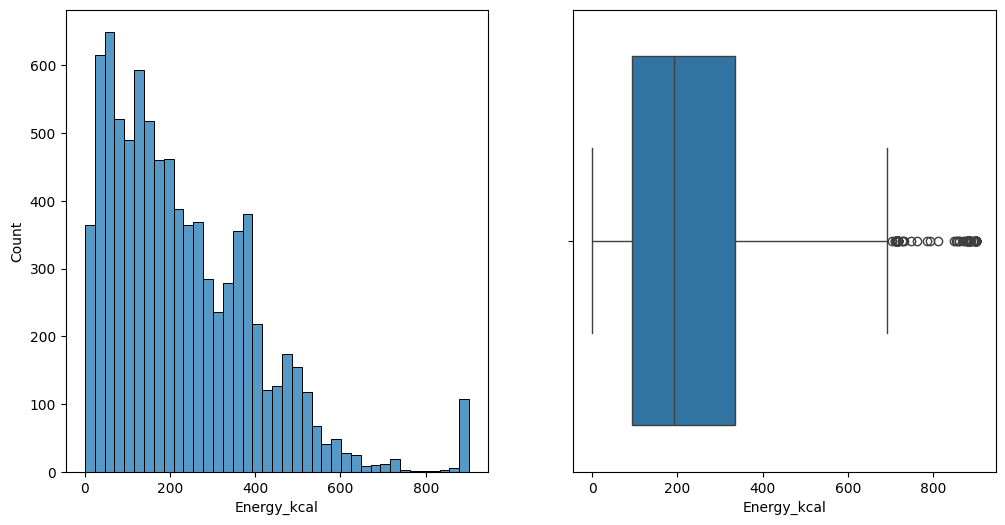

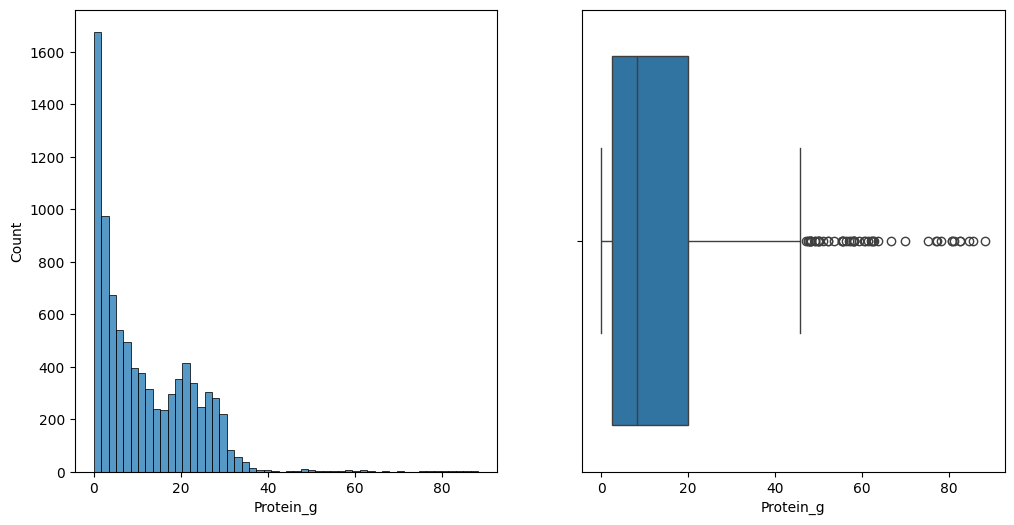

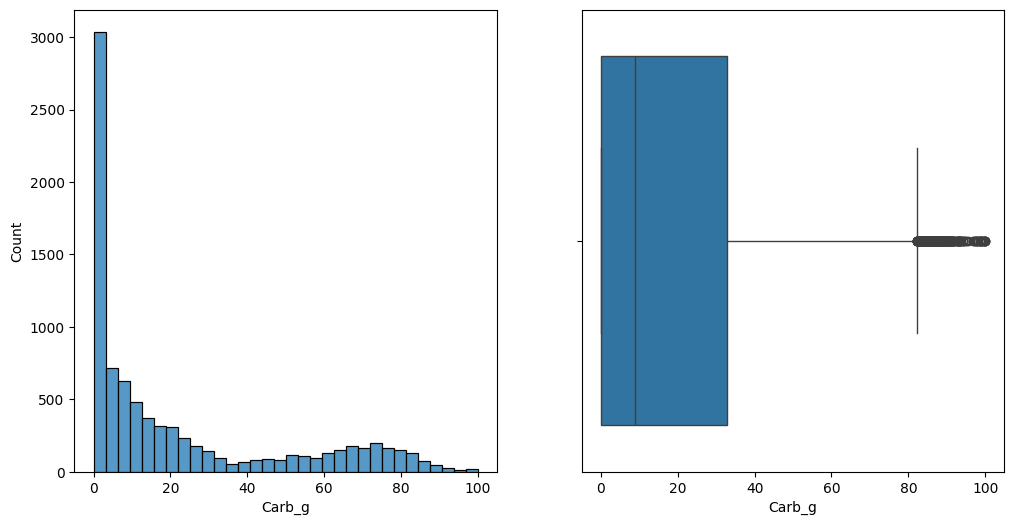

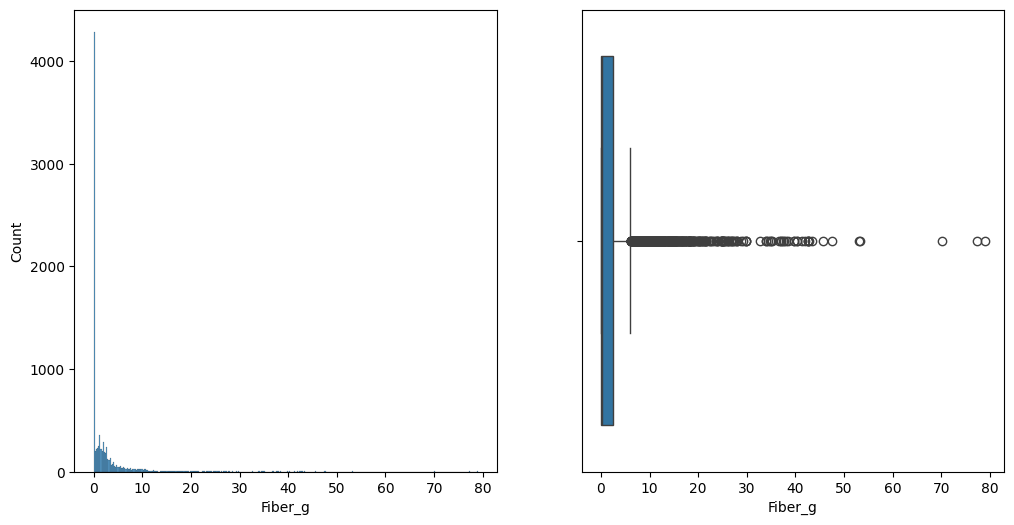

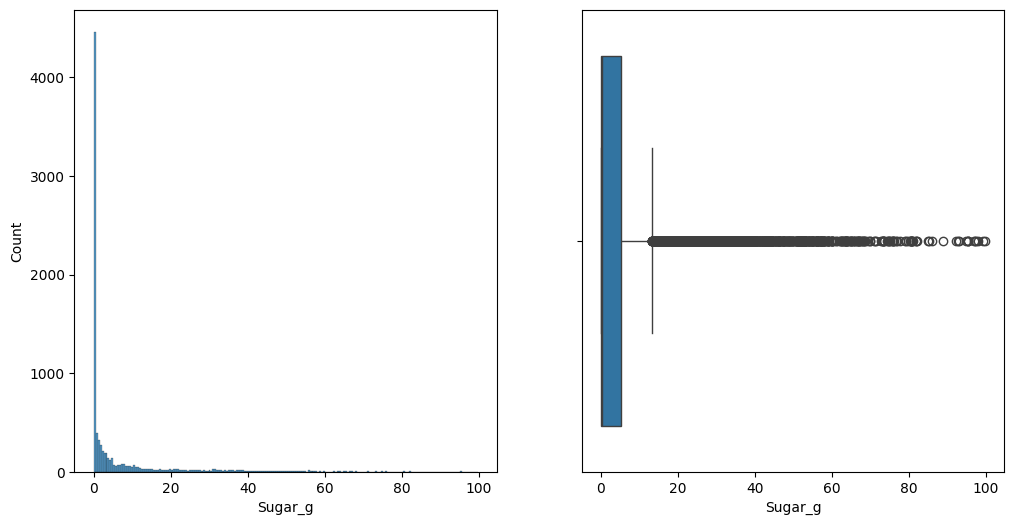

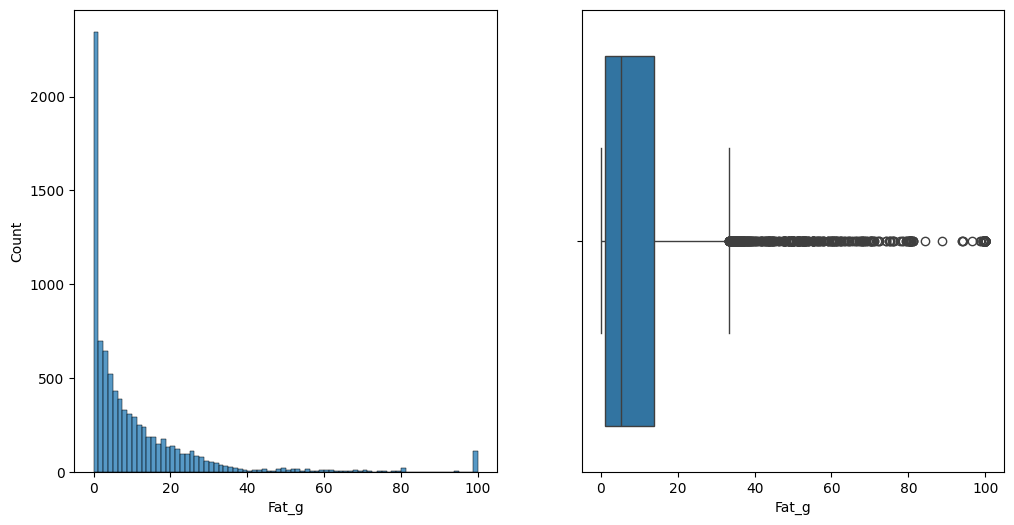

In [ ]:
# Univariate for important features
cols = ['Energy_kcal', 'Protein_g', 'Carb_g', 'Fiber_g', 'Sugar_g', "Fat_g"]
for col in cols:
  hist_box(data1, col)

In [ ]:
# excluding columns that are not numeric
data_num = data1.select_dtypes(include=np.number)
data_num.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


In [ ]:
# Using boxcox to stabilize variance and make a dataset more closely approximate normality
from scipy.stats import boxcox
# add 1 since affected by zeroes
data_pos = data_num + 1
data_bx = pd.DataFrame(index=data_pos.index)
for i in data_pos.columns.values:
    data_bx[i] = boxcox(data_pos.loc[:, i])[0]

In [ ]:
data_bx.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.140152,0.0,...,0.031506,0.004927,3.186843,0.000000,0.019689,1.187185,0.000000,5.897452,0.674112,0.083954
1,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.111836,0.0,...,0.031506,0.004927,3.186843,0.015185,0.142210,1.187185,0.003960,5.774520,0.674112,0.048072
2,30.599777,0.253858,4.059063,0.000000,0.000000,0.0,2.711488,0.000998,0.009878,0.0,...,0.004943,0.000997,1.601403,0.000997,0.000000,0.000000,0.000000,1.777189,0.000000,0.009920
3,21.085439,4.504850,3.087499,1.232397,0.360184,0.0,2.509633,0.120684,0.468905,0.0,...,0.191363,0.026682,6.150173,0.035193,0.249940,3.998436,0.008798,19.739039,2.458809,0.896741
4,21.527013,4.665389,3.113172,1.364671,0.365391,0.0,2.573502,0.056903,0.474341,0.0,...,0.183964,0.013442,6.384389,0.022202,0.323005,4.062188,0.011644,20.962339,2.458809,0.889206


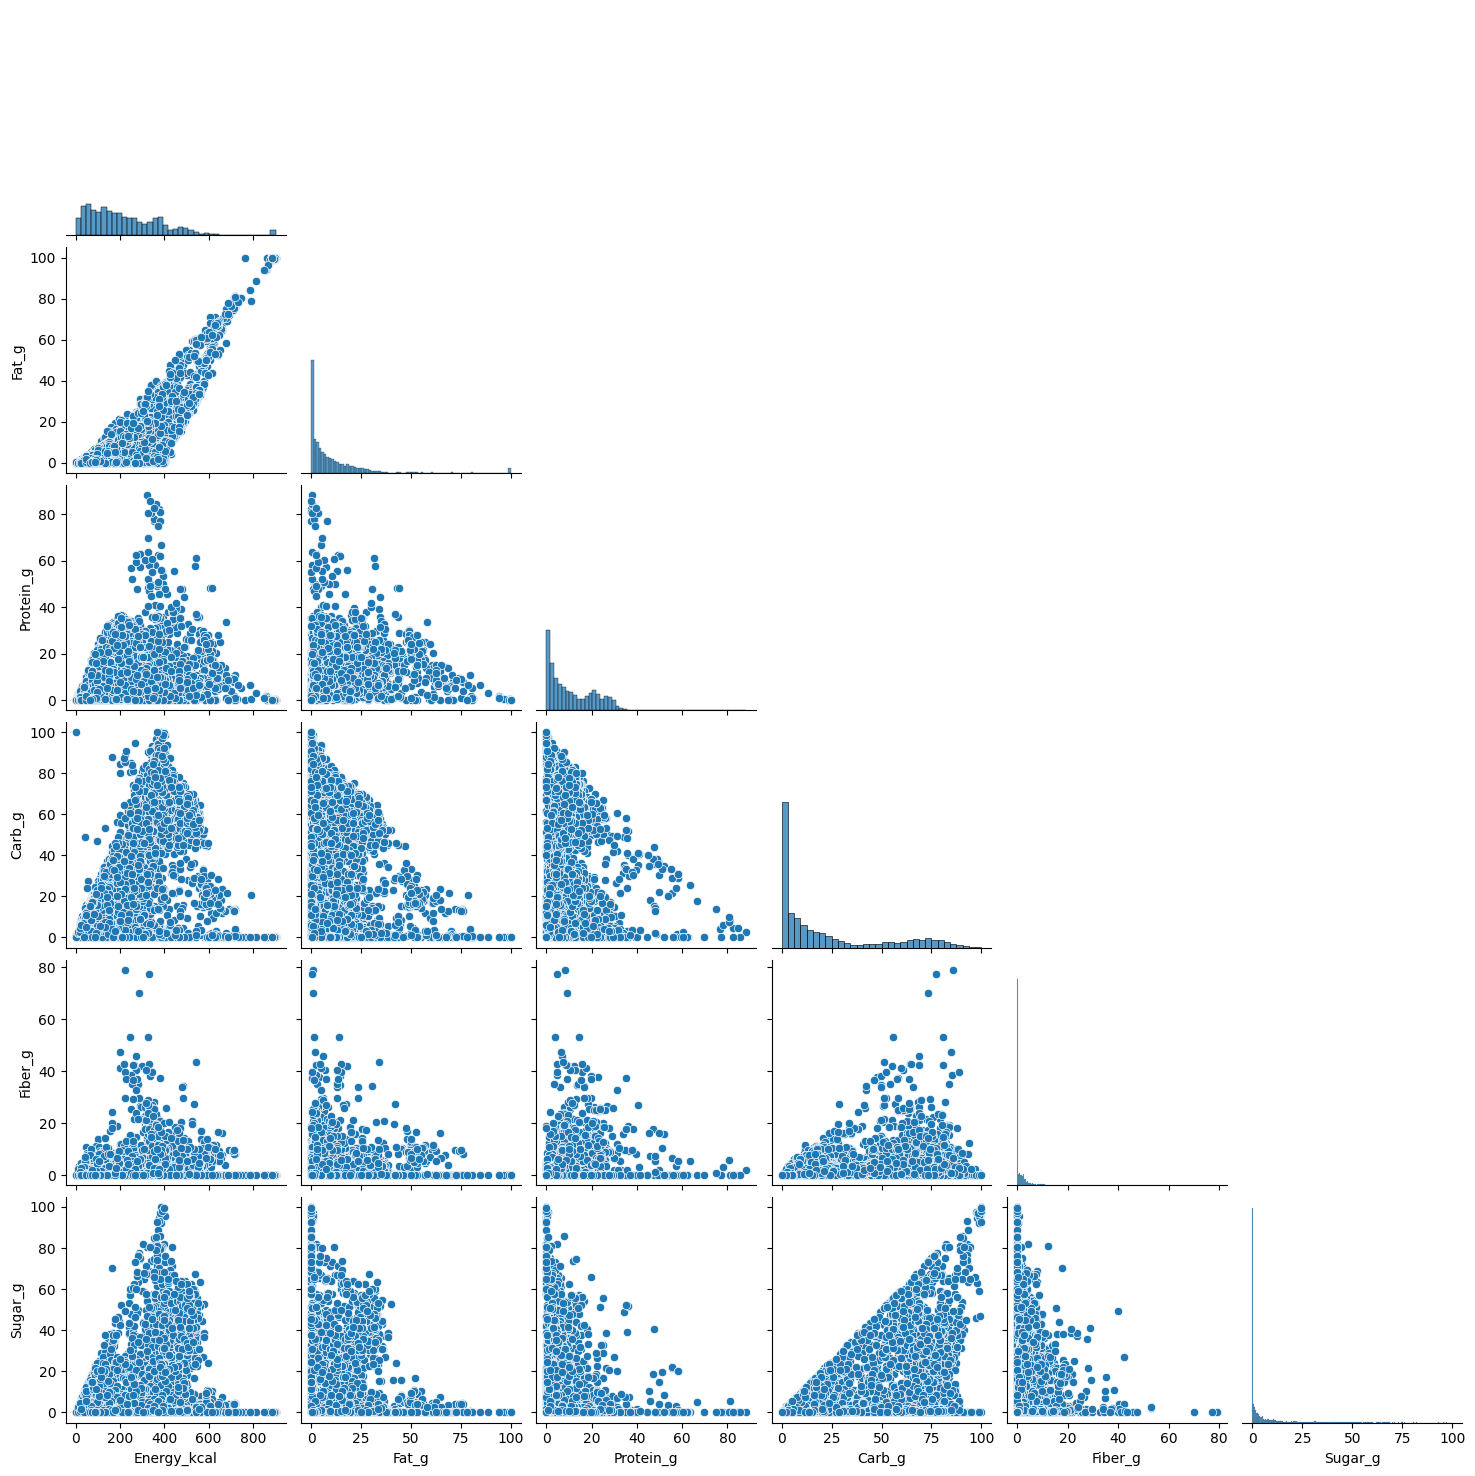

In [ ]:
# Pairplot of kcal, fats, protein, carbs, fiber and sugar with data_num
sns.pairplot(data_num[['Energy_kcal', 'Fat_g', 'Protein_g', 'Carb_g', 'Fiber_g', 'Sugar_g']], corner=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(data_bx)
scaled_data = scaler.fit_transform(data_bx)
scaled_data = pd.DataFrame(scaled_data, columns=data_bx.columns)
scaled_data.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,2.090273,-1.322995,2.103383,-1.263489,-0.822821,-0.941047,1.717135,-1.213938,-0.301751,-0.776017,...,-1.018702,-1.169030,0.048175,-1.327339,-1.727472,-1.301686,-0.846770,-0.917399,-0.675100,-1.179795
1,2.090273,-1.322995,2.103383,-1.263489,-0.822821,-0.941047,1.717135,-1.213938,-0.417314,-0.776017,...,-1.018702,-1.169030,0.048175,-1.019397,-1.391277,-1.301686,-0.799435,-0.937399,-0.675100,-1.270715
2,2.499789,-1.569456,2.250277,-1.297100,-0.920683,-0.941047,1.740278,-1.236093,-0.833428,-0.776017,...,-1.380494,-1.232186,-1.024800,-1.307127,-1.781499,-1.940659,-0.846770,-1.587732,-1.216401,-1.367386
3,0.863528,1.010920,1.338567,-0.586967,-0.305192,-0.941047,1.539288,0.101100,1.039957,-0.776017,...,1.158560,-0.819442,2.053663,-0.613635,-1.095667,0.211402,-0.741594,1.334515,0.757982,0.879687
4,0.939469,1.108368,1.362659,-0.510748,-0.296294,-0.941047,1.602883,-0.611489,1.062144,-0.776017,...,1.057785,-1.032212,2.212173,-0.877100,-0.895176,0.245715,-0.707581,1.533536,0.757982,0.860594


<Axes: >

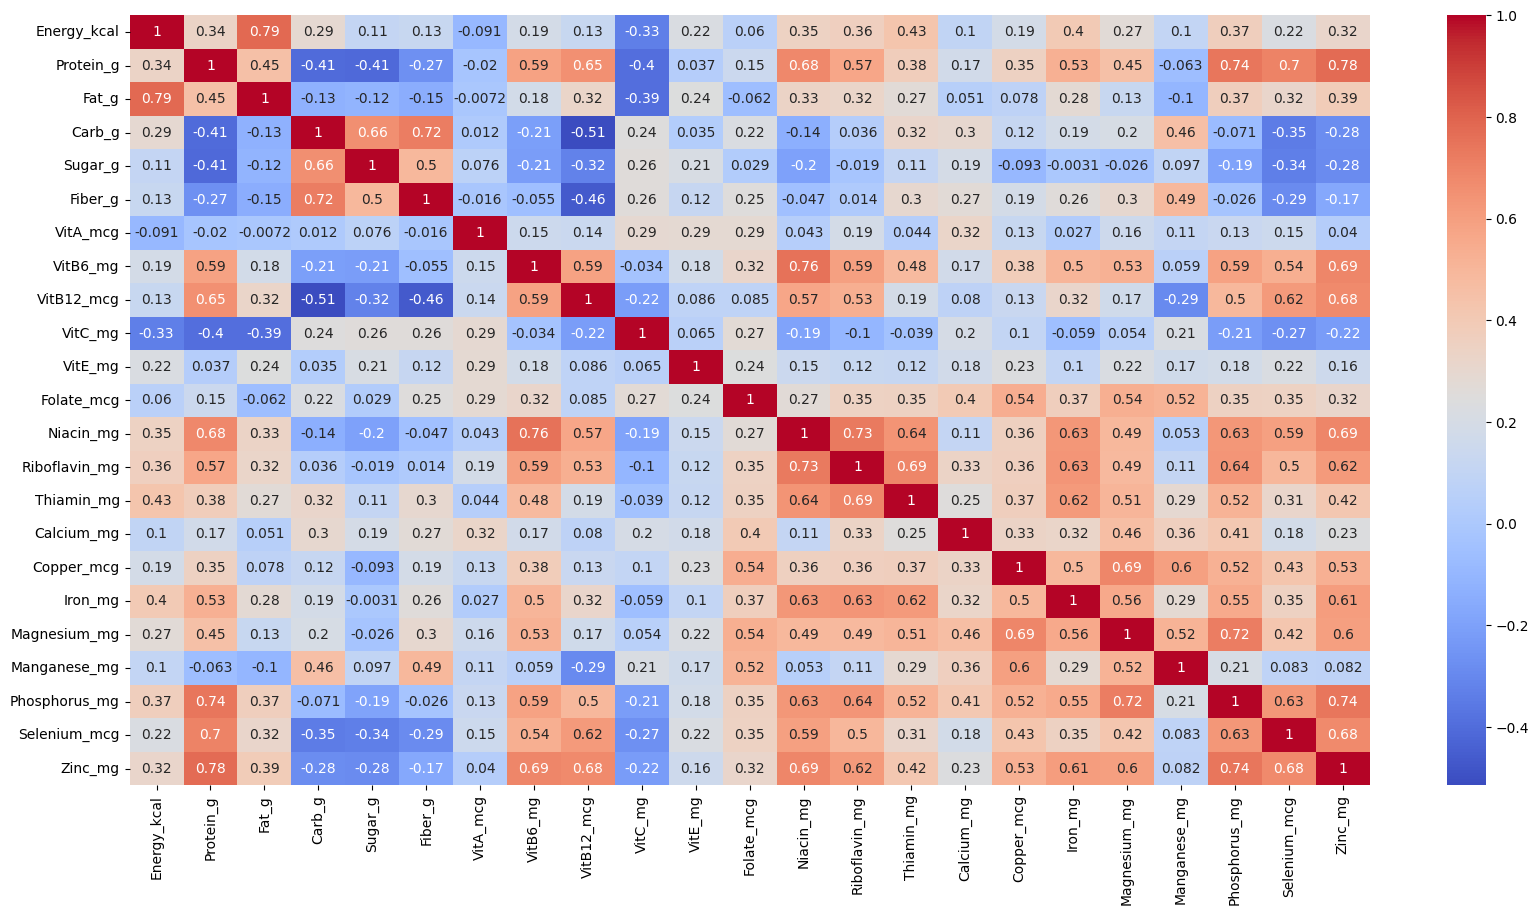

In [ ]:
# checking for linear dependence
plt.figure(figsize=(20, 10))
sns.heatmap(scaled_data.corr(), annot=True, cmap="coolwarm")

In [ ]:
# Run PCA to reduce dimension
from sklearn.decomposition import PCA

# number of components to generate
n = scaled_data.shape[1]

# Run PCA
pca = PCA(n_components=n, random_state=0)
data_pca = pd.DataFrame(pca.fit_transform(scaled_data))


Text(0, 0.5, 'Cumulative Explained Variance')

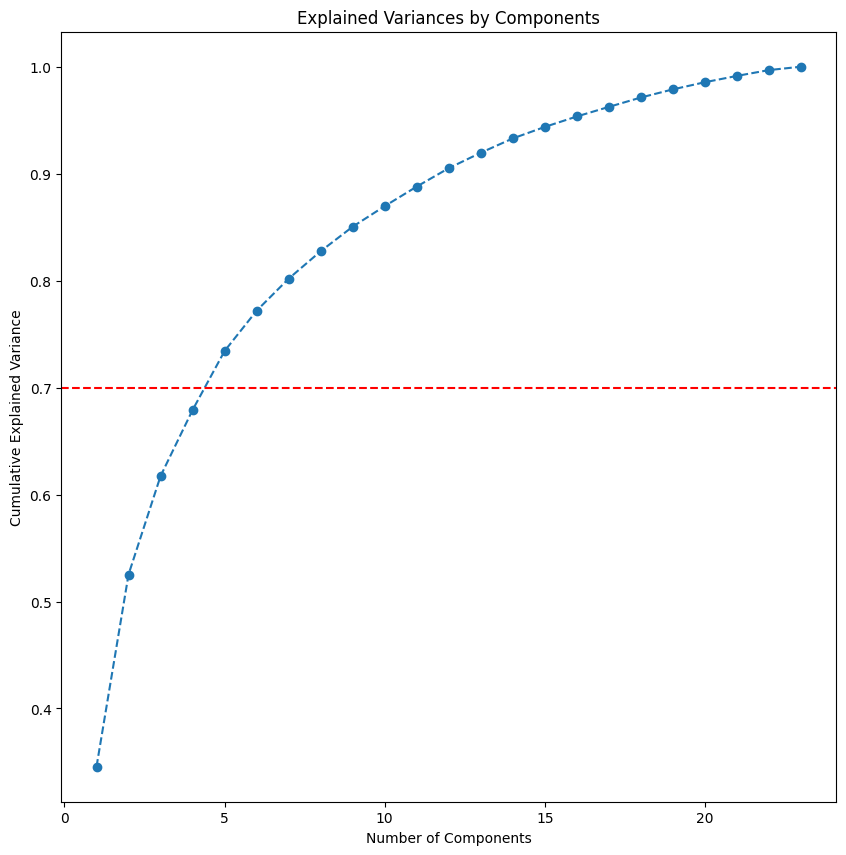

In [ ]:
# visualize the Explained Individual Components
plt.figure(figsize = (10,10))
plt.plot(range(1,24), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.axhline(y=0.7, color='r', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
pc_comps = ["PC1", "PC2", "PC3", "PC4", "PC5"]
ddata_pca = pd.DataFrame(np.round(pca.components_[:5,:],2),index=pc_comps,columns=scaled_data.columns)
exp_var = pca.explained_variance_ratio_
data_pca.T

NameError: name 'pd' is not defined

In [ ]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.70):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  5


In [ ]:
# highlighting the min and max values of each PC
def color_high(val):
    if val <= -0.15:
        return 'background: pink'
    elif val >= 0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
Energy_kcal,0.170000,0.040000,0.510000,0.160000,-0.200000
Protein_g,0.290000,-0.200000,0.030000,-0.090000,-0.050000
Fat_g,0.160000,-0.120000,0.410000,0.280000,-0.270000
Carb_g,-0.030000,0.410000,0.250000,-0.030000,0.100000
Sugar_g,-0.080000,0.300000,0.210000,0.280000,0.260000
Fiber_g,-0.000000,0.400000,0.150000,-0.120000,0.080000
VitA_mcg,0.060000,0.100000,-0.300000,0.540000,0.060000
VitB6_mg,0.270000,-0.050000,-0.120000,-0.010000,0.250000
VitB12_mcg,0.220000,-0.270000,-0.110000,0.170000,0.200000
VitC_mg,-0.070000,0.240000,-0.330000,0.130000,0.250000




*   PC1: Foods that are high in protein and most minerals
*   PC2: Foods that are high in sugar, fiber, carbs and manganese, but low in protein
*   PC3: Foods high in kcals, carbs, and fat, and low in some vitamins and minerals
*   PC4: Foods high in fats, sugar, Vitamin A and E and low in some minerals like iron and copper
*   PC5: Foods high in sugar and some vitamin B complexes and vitamin C, and low in some minerals

